In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gopiashok","key":"80d901df789616b43b6eacb5bd415b49"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [02:32<00:00, 21.8MB/s]
100% 2.29G/2.29G [02:33<00:00, 16.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name='chest-xray-pneumonia.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),padding='same', activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)         

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'chest_xray/chest_xray/train',
        target_size=(64,64),
        batch_size=16 ,
        class_mode='binary')

val_set = test_datagen.flow_from_directory(
        'chest_xray/chest_xray/test',
        target_size=(64,64),
        batch_size=16,
        class_mode='binary')

r=model.fit(
        training_set,
        steps_per_epoch=326, 
        epochs=10,
        validation_data=val_set,
        validation_steps=39)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
326/326 [==============================] - 89s 173ms/step - loss: 0.5457 - accuracy: 0.7586 - val_loss: 0.3063 - val_accuracy: 0.8798
Epoch 2/10
326/326 [==============================] - 57s 174ms/step - loss: 0.2500 - accuracy: 0.8964 - val_loss: 0.3442 - val_accuracy: 0.8526
Epoch 3/10
326/326 [==============================] - 56s 171ms/step - loss: 0.2093 - accuracy: 0.9169 - val_loss: 0.2905 - val_accuracy: 0.9054
Epoch 4/10
326/326 [==============================] - 55s 170ms/step - loss: 0.1977 - accuracy: 0.9247 - val_loss: 0.4152 - val_accuracy: 0.8670
Epoch 5/10
326/326 [==============================] - 56s 173ms/step - loss: 0.1671 - accuracy: 0.9336 - val_loss: 0.3979 - val_accuracy: 0.8542
Epoch 6/10
326/326 [==============================] - 56s 172ms/step - loss: 0.1634 - accuracy: 0.9320 - val_loss: 0.2669 - val_accuracy: 0.9022
Epoch 7/10
326/326 [===========================

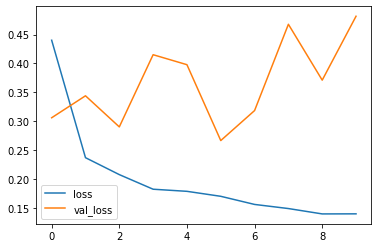

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

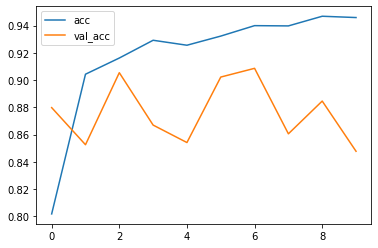

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:
 model.save('gopi')

INFO:tensorflow:Assets written to: gopi/assets


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
model=load_model('gopi')
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
test_image=image.load_img('/content/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg',target_size=(64,64))
test=image.img_to_array(test_image)
tes=np.expand_dims(test,axis=0)
result=model.predict_classes(tes)
result

array([[1]], dtype=int32)